<hr style="height: 4px; color: #839D2D; width: 100%; ">

# <font color='#61210B'>Formation OpenClassRooms   -   Parcours DATA ANALYST</font>

<hr style="height: 2px; color: #839D2D; width: 100%; ">

## <font color='#38610B'>Projet V - Etude de Marché Internationale</font>

### Partie 2 - Analyse
  
A partir du ...
* <font color='#013ADF'>DataFrame <strong>gen</strong></font> : Fichier enrichi, nettoyé pour etude de marché


**<font color='#38610B'>- Date : 15 Avr 2019</font>**  
Auteur : Frédéric Boissy

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'>INITIALISATIONS - DECLARATIONS</font>

In [1]:
# -*- coding: utf8 -*-
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format   # Nombres avec sepa milliers "," et 2décimales après "."
pd.options.mode.use_inf_as_na = True
from pandas.plotting import scatter_matrix

import seaborn as sns
import matplotlib as matplt
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as scst
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import statsmodels.api as sm
from sklearn import decomposition, preprocessing
from functions import *

from IPython.display import display, Markdown, HTML  # pour gérer un affichage plus joli que la fonction "print"

import time   # Librairie temps pour calculs durée par exemple
trt_start_time = time.time()

In [2]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

<hr style="height: 3px; color: #839D2D; width: 100%; ">

### <font color='#61210B'>IMPORT DATAS</font>

In [3]:
gen = pd.read_csv("DATA/selection_pays.csv")
gen.head()

,pays,population,evo_pop_%,qt_kcal/h,qt_prot_gr/h,ratio_prot_viande_%,qt_volaille_Kg/h,PIBh_$,tot_poultry_exch_$
0,Armenie,"2,893,509.00",0.56,"2,928.00",90.04,17.91,13.82,"3,843.59","4,538.00"
1,Afghanistan,"31,731,688.00",10.17,"2,090.00",58.25,8.33,2.33,647.97,0.00
2,Albanie,"2,918,978.00",-0.73,"3,193.00",111.42,20.39,14.39,"4,413.08","330,235.00"
3,Algerie,"38,338,562.00",6.15,"3,296.00",91.96,8.16,7.59,"5,471.12",0.00
4,Angola,"25,998,340.00",11.25,"2,473.00",57.26,21.73,14.31,"5,258.41","1,584,588.00"


In [4]:
df = gen[['pays', 'evo_pop_%', 'ratio_prot_viande_%', 'qt_kcal/h', 'qt_prot_gr/h',
          'qt_volaille_Kg/h', 'PIBh_$']].copy()
# df = gen.copy()
df = df.set_index('pays')
df.head()

,evo_pop_%,ratio_prot_viande_%,qt_kcal/h,qt_prot_gr/h,qt_volaille_Kg/h,PIBh_$
pays,,,,,,
Armenie,0.56,17.91,"2,928.00",90.04,13.82,"3,843.59"
Afghanistan,10.17,8.33,"2,090.00",58.25,2.33,647.97
Albanie,-0.73,20.39,"3,193.00",111.42,14.39,"4,413.08"
Algerie,6.15,8.16,"3,296.00",91.96,7.59,"5,471.12"
Angola,11.25,21.73,"2,473.00",57.26,14.31,"5,258.41"


In [5]:
df.info()
print(df.shape)
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, Armenie to Soudan
Data columns (total 6 columns):
evo_pop_%              168 non-null float64
ratio_prot_viande_%    168 non-null float64
qt_kcal/h              168 non-null float64
qt_prot_gr/h           168 non-null float64
qt_volaille_Kg/h       168 non-null float64
PIBh_$                 168 non-null float64
dtypes: float64(6)
memory usage: 9.2+ KB
(168, 6)


,evo_pop_%,ratio_prot_viande_%,qt_kcal/h,qt_prot_gr/h,qt_volaille_Kg/h,PIBh_$
count,168.00,168.00,168.00,168.00,168.00,168.00
mean,4.46,20.17,"2,849.73",81.27,22.18,"14,753.64"
std,4.31,9.44,438.77,20.03,18.84,"20,965.00"
min,-4.39,2.19,"1,879.00",37.66,0.38,332.92
25%,1.38,12.57,"2,524.25",64.22,6.37,"1,866.19"
50%,3.91,20.67,"2,829.50",81.26,18.91,"6,131.56"
75%,7.05,27.12,"3,201.75",94.88,30.23,"16,087.05"
max,22.03,42.80,"3,768.00",133.54,75.54,"113,625.13"


<hr style="height: 3px; color: #839D2D; width: 100%; ">

### <font color='#61210B'>CREATION DES GROUPES DE PAYS</font>

<b>DENDROGRAMME - Sur les 6 variables (4 Imposées + 2)</b>

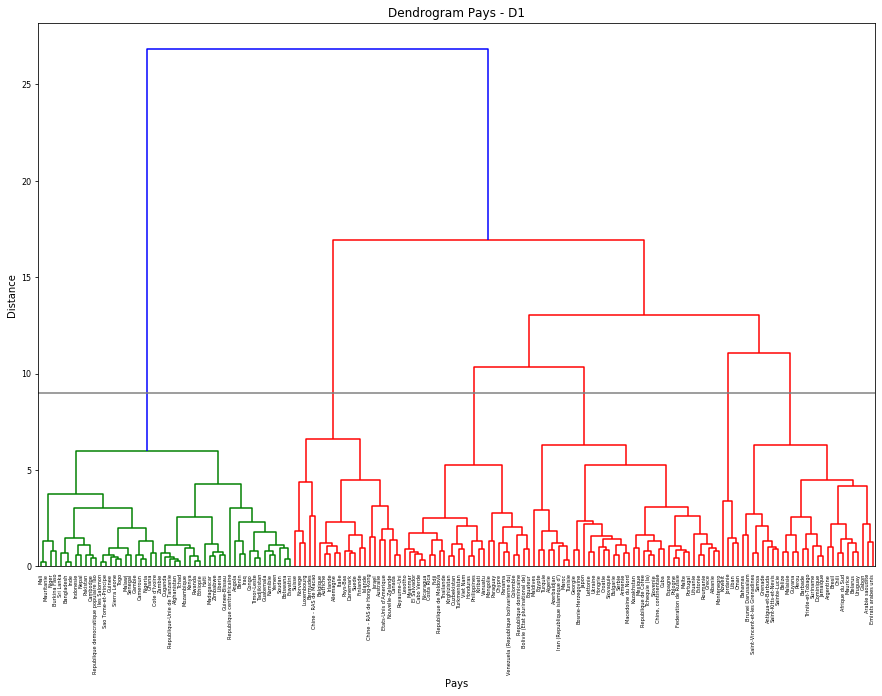

In [6]:
# préparation des données pour le clustering
X = df.values
pays = df.index
# Centrage et Réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')
# Affichage du dendrogramme
plt.figure(figsize=(15,10))
plt.axhline(9, color="grey")
dendrogram(Z, labels = pays, orientation = "top")

plt.title('Dendrogram Pays - D1')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.yticks(size=8)
plt.savefig('OUTFILES/Etude1-Dendrogramme_full_PJ5.png', 
            dpi=100, bbox_inches='tight')

plt.show()
plt.close()

<b>DECOUPAGE - Groupes/Clusters</b>

A la lecture de ce dendrogramme, la decoupe en 6 groupes apparait pertinentes.

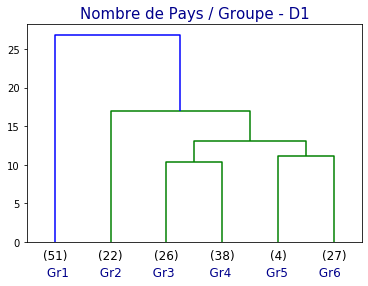

In [7]:
dendrogram(Z, truncate_mode = 'lastp', p=6)
plt.title("Nombre de Pays / Groupe - D1", fontsize=15, color = 'darkblue')
plt.xticks(size=12)
plt.xlabel('Gr1        Gr2        Gr3         Gr4         Gr5        Gr6', color = 'darkblue', size=12)
plt.savefig('OUTFILES/Etude1-Dendrogramme_trunc_PJ5.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

In [8]:
# Coupage du dendrogramme en 6 clusters
clusters = fcluster(Z, 6, criterion='maxclust')
# Comparaison des clusters trouvés avec les classification des pays
dfgrp = pd.DataFrame({"pays": pays, "groupe": clusters})
# Ajoutons le Groupe/Cluster au Dataframe
df["groupe"] = clusters
df.head()

,evo_pop_%,ratio_prot_viande_%,qt_kcal/h,qt_prot_gr/h,qt_volaille_Kg/h,PIBh_$,groupe
pays,,,,,,,
Armenie,0.56,17.91,"2,928.00",90.04,13.82,"3,843.59",4
Afghanistan,10.17,8.33,"2,090.00",58.25,2.33,647.97,1
Albanie,-0.73,20.39,"3,193.00",111.42,14.39,"4,413.08",4
Algerie,6.15,8.16,"3,296.00",91.96,7.59,"5,471.12",4
Angola,11.25,21.73,"2,473.00",57.26,14.31,"5,258.41",1


#### Mémorisation des Groupes/Clusters dans des Dataframe  (g1, g2, g3...)

In [9]:
gp1 = df.groupby("groupe").get_group(1) 
gp2 = df.groupby("groupe").get_group(2)  
gp3 = df.groupby("groupe").get_group(3) 
gp4 = df.groupby("groupe").get_group(4)  
gp5 = df.groupby("groupe").get_group(5) 
gp6 = df.groupby("groupe").get_group(6) 

#### Export dans fichiers csv & excels

In [10]:
df.to_csv('OUTFILES/Etude1-Pays_Groupes_dendro.csv', sep=',', encoding='utf-8')  #  Index = False si pas besoin de l'index

In [11]:
path = "OUTFILES/Etude1-Pays_Groupes_dendro.xlsx"
writer = pd.ExcelWriter(path, engine='xlsxwriter')
df.to_excel(writer, 'Sheet1')
gp1.to_excel(writer, 'Groupe1')
gp2.to_excel(writer, 'Groupe2')
gp3.to_excel(writer, 'Groupe3')
gp4.to_excel(writer, 'Groupe4')
gp5.to_excel(writer, 'Groupe5')
gp6.to_excel(writer, 'Groupe6')
writer.save()

In [12]:
writer.save()

#### Calcul des Centroides

In [13]:
#centroide = df.groupby("groupe").mean()
centroide = df.groupby('groupe') \
       .agg({'groupe':'size', 'evo_pop_%':'mean', 'qt_kcal/h':'mean', 'qt_prot_gr/h':'mean', 
             'ratio_prot_viande_%':'mean', 'qt_volaille_Kg/h':'mean', 'PIBh_$':'mean'}) \
       .rename(columns={'groupe':'count'})

centroide

,count,evo_pop_%,qt_kcal/h,qt_prot_gr/h,ratio_prot_viande_%,qt_volaille_Kg/h,PIBh_$
groupe,,,,,,,
1,51,7.53,"2,393.65",60.29,10.81,4.89,"1,793.06"
2,22,2.58,"3,391.59",108.31,29.61,31.87,"59,650.60"
3,26,3.97,"2,676.62",72.78,21.56,18.96,"5,490.82"
4,38,0.86,"3,193.55",96.30,19.47,19.61,"12,570.54"
5,4,20.21,"3,202.50",88.95,22.81,32.07,"20,606.95"
6,27,3.38,"2,900.26",84.73,29.41,52.15,"13,777.15"


* Groupe1 - Pays très faiblement développés (PIB/h faible) / très peu consommateurs de volailles
* <b> Groupe2 - Pays bien developpés à fort potentiel (PIB/h élevé) et assez bons consommateurs de volailles</b>
* Groupe3 - Pays faiblement développés et peu consommateurs de volailles
* <b> Groupe4 - Pays moyennement développés et peu consommateurs de volailles<b>
* <b> Groupe5 - Pays moyen-orient à forte évolution démographique et bons consommateurs de volailles</b>
* <b> Groupe6 - Pays moyennement développés mais fort consommateurs de volailles</b>  


In [14]:
# Exports Fichiers csv/excel
centroide.to_csv('OUTFILES/Etude1-centroide_dendro.csv', sep=',', encoding='utf-8')
centroide.to_excel("OUTFILES/Etude1-centroide_dendro.xlsx", sheet_name='Sheet1')

<hr style="height: 3px; color: #839D2D; width: 100%; ">

### <font color='#61210B'>CALCUL DES COMPOSANTES PRINCIPALES (sur colonnes/variables)</font>

In [15]:
# choix du nombre de composantes à calculer
n_comp = 6

# import de l'échantillon
data = df.copy()
data.drop(columns=['groupe'], inplace=True)

# selection des colonnes à prendre en compte dans l'ACP
cols = data.columns
data_pca = data[cols]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data.index # data["pays"] # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

X_projected = pca.fit_transform(X_scaled)
df_comp = pd.DataFrame(X_projected, index=data.index, 
                       columns=["F"+str(i+1) for i in range(n_comp)])
df_comp.head()

,F1,F2,F3,F4,F5,F6
pays,,,,,,
Armenie,0.05,-0.66,-1.00,-0.20,0.20,0.24
Afghanistan,-2.91,0.13,0.69,0.29,-0.10,0.45
Albanie,1.05,-1.20,-1.13,-0.62,0.46,0.59
Algerie,-0.42,-1.67,0.25,-0.91,-0.21,-0.15
Angola,-1.66,0.88,1.09,0.03,0.53,-0.31


<hr style="height: 2px; color: #839D2D; width: 100%; ">

#### Eboulis des Valeurs Propres  (Scree Plot) après ACP
#### Fixons un seuil de 90% pour notre variance cumulée.


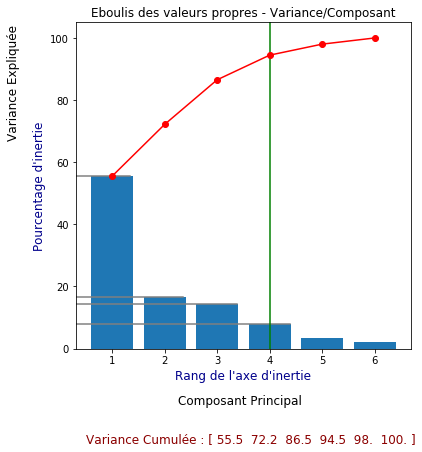

In [16]:
# Eboulis des valeurs propres
plt.figure(figsize=(6,6))
v = np.cumsum(pca.explained_variance_ratio_)*100

plt.axhline(v[0], xmax=0.16, color="grey")
plt.axhline(v[1]-v[0], xmax=0.32, color="grey")
plt.axhline(v[2]-v[1], xmax=0.48, color="grey")
plt.axhline(v[3]-v[2], xmax=0.64, color="grey")
plt.axvline(4, color="green")

plt.text(-1,68, "Variance Expliquée", color = 'black', size=12, rotation=90)
plt.text(2.25,-18, "Composant Principal", color = 'black', size=12)
plt.text(0.5,-30, "Variance Cumulée : %s" %np.round(v, 1), color = 'darkred', size=12)
plt.xlabel('', color = 'darkblue', size=12)
plt.ylabel('', color = 'darkblue', size=12)

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres - Variance/Composant")
plt.savefig('OUTFILES/Etude2-Eboulis_Valeurs_Propres_PJ5.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

<b>Critère de rétention d’un composant principal</b> :  
Une fois, nos composants déterminer, nous devons retenir ceux ayant des variances importantes et ignorer ceux ayant de faibles variances.   

Pour ce faire on peut se baser sur les critères suivantes( ce ne sont pas des lois) :

- Retenir les k composants ayant une valeur propre supérieure à 1(Critère de Kaiser – Guttman)  
- Retenir les k composants dont les valeurs propres précédent la cassure de la courbe on parle aussi du coude  
- <font color='darkgreen'>Retenir les k premiers composants qui expliquent y% de la variance.</font>  
- Retenir les k premiers composants dont la part ou proportion de variance est supérieur à la moyenne( y % > 1/p%)  


#### Pour expliquer notre seuil de départ (> 90%), je choisis les 4 premiers composants (94.5%)

<hr style="height: 2px; color: #839D2D; width: 100%; ">

#### Visualisation Cercles des Corrélations Obtenus par ACP

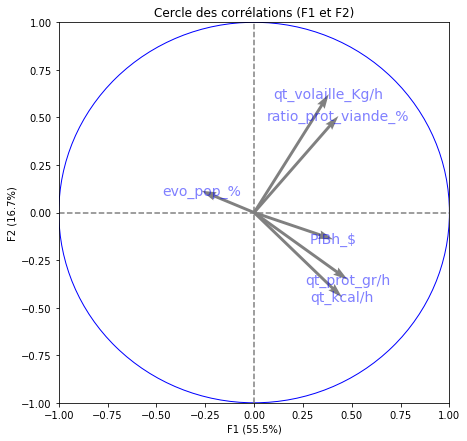

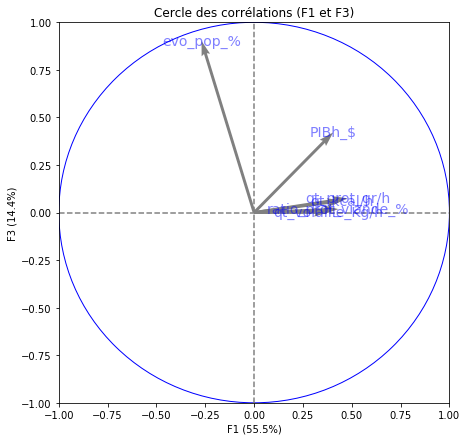

In [17]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
plt.savefig('OUTFILES/Etude2-Cercle_Corr_1er_Plan_Facto_PJ5.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()
display_circles(pcs, n_comp, pca, [(0,2)], labels = np.array(features))
plt.savefig('OUTFILES/Etude2-Cercle_Corr_2em_Plan_Facto_PJ5.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

SUR LE PREMIER PLAN FACTORIEL ON CONSTATE QUE 2 GROUPES DE VARIABLES CORRELEES SE DESSINENT (vu aussi sur la Heatmap) :
    - QT_VOLAILLE_KG/H & LE RATIO DE PROTEINES_VIANDE
    - QT_KCAL & QT_PROT

DE PLUS, CES GROUPES, FORMANT UN ANGLE DE 90° ENTRE EUX, NE SONT ABSOLUEMENT PAS CORRELES ENTRE EUX.

DANS UNE CERTAINE MESURE, IL Y A PEUT-ETRE UNE CORRELATION NEGATIVE ENTRE L'EVOLUTION DE LA POPULATION ET LE PIB/H.  
L'EFFET PARAIT CEPENDANT FAIBLE DU FAIT DE LA COURTE PROJECTION (on est loin du cercle)

SUR LE 2EME PLAN FACTORIEL, ON CONSTATE QUE L'EVO% DE LA POPULATION EST BIEN REPRESENTEE CAR ELLE EST PROCHE DU BORD DU CERCLE.

<hr style="height: 2px; color: #839D2D; width: 100%; ">

#### Visualisation des Groupes dans le premier Plan Factoriel Obtenu par ACP  (F1-F2)

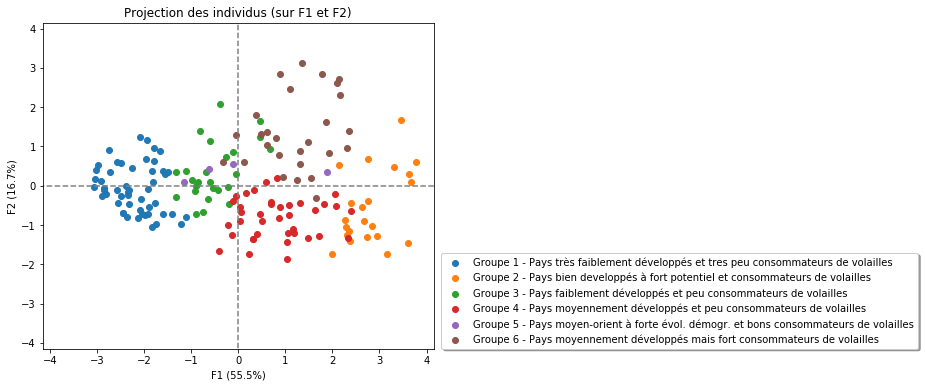

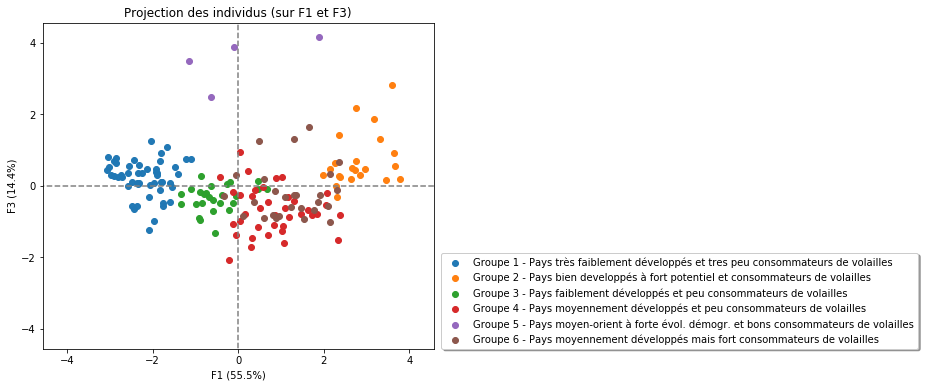

In [18]:
# Groupe/Clusters auxquel appartient le pays (1,2,3,4,5) --> Zone groupes mémorisée
dfgrp.loc[dfgrp['groupe']==1, 'nomgroupe'] = "Pays très faiblement développés et tres peu consommateurs de volailles"
dfgrp.loc[dfgrp['groupe']==2, 'nomgroupe'] = "Pays bien developpés à fort potentiel et consommateurs de volailles"
dfgrp.loc[dfgrp['groupe']==3, 'nomgroupe'] = "Pays faiblement développés et peu consommateurs de volailles"
dfgrp.loc[dfgrp['groupe']==4, 'nomgroupe'] = "Pays moyennement développés et peu consommateurs de volailles"
dfgrp.loc[dfgrp['groupe']==5, 'nomgroupe'] = "Pays moyen-orient à forte évol. démogr. et bons consommateurs de volailles"
dfgrp.loc[dfgrp['groupe']==6, 'nomgroupe'] = "Pays moyennement développés mais fort consommateurs de volailles"
dfgrp['nomgroupe'] = ("Groupe " + dfgrp['groupe'].astype(str) + " - " + dfgrp['nomgroupe'])
dfgrp

# Projection des individus
X_projected = pca.transform(X_scaled)
# display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2)], labels = np.array(names))
#plt.legend(loc=(1.02,0), fontsize=12, shadow=True)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], 
                        illustrative_var = dfgrp.nomgroupe, alpha = 0.99)
plt.savefig('OUTFILES/Etude2-Projections_Groupes_1er_Plan_Facto_PJ5.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

display_factorial_planes(X_projected, n_comp, pca, [(0,2)], 
                         illustrative_var = dfgrp.nomgroupe, alpha = 0.99)
plt.savefig('OUTFILES/Etude2-Projections_Groupes_2eme_Plan_Facto_PJ5.png', dpi=100, bbox_inches='tight')

plt.show()
plt.close()

Sur la 1ère Projection, les points sont assez espacés montrant une variance signifiactive.  Bonne représentation des données  
Sur la 2ème Projection, nous constatons que le groupe 5 est marginal, (valeur forte de l'evolution de la population constatée)  
Pour mémoire, les 8 pays que nous avons sélectionnés etaient issus des groupes 2(4), 5(2) et 6(2)

TROUVER LES PAYS AYANT :   
- une VALEUR de F1 forte (>2) 
- une VALEUR de F2 forte (>2) pour une F1>0

In [19]:
#df_comp[((df_comp['F1'] > 2) & (df_comp['F2'] > 0)) | ((df_comp['F1'] > 0) & (df_comp['F2'] > 2)) ]
df_comp = df_comp[(df_comp['F1'] > 2) | ((df_comp['F1'] > 0) & (df_comp['F2'] > 2)) ]
df_comp

,F1,F2,F3,F4,F5,F6
pays,,,,,,
Antigua-et-Barbuda,1.10,2.47,-0.31,-0.14,-0.13,0.63
Argentine,2.30,0.95,-0.12,-0.58,1.38,-0.02
Australie,3.31,0.47,1.30,0.95,-0.07,0.03
Autriche,2.74,-1.30,0.45,0.44,0.36,-0.63
Bahamas,2.14,2.72,0.33,0.04,0.02,0.25
Bermudes,3.46,1.68,0.15,2.51,-1.08,0.35
Brunei Darussalam,2.35,1.40,0.68,0.19,-0.87,0.11
Canada,2.75,-0.39,0.69,0.39,-0.14,-0.26
Danemark,2.67,-0.90,0.50,1.01,-0.18,0.09


#### A ce Stade il devient intéressant de rajouter :
- La population  
- La zone "Trade Value $" de commerce entre la France et un pays acheteur en 2013

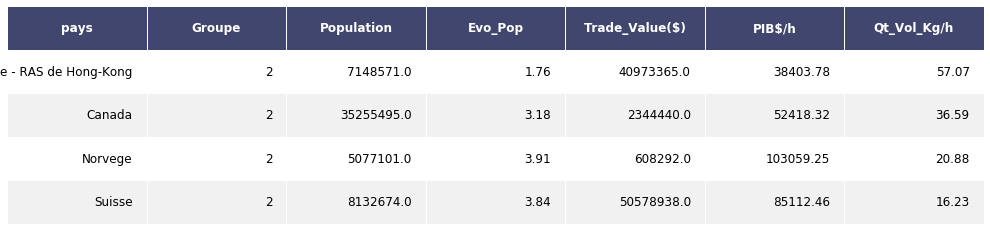

In [20]:
sel = df_comp.copy()
sel = sel.merge(df, left_index=True, right_index=True)
sel.drop(columns=['F1', 'F2', 'F3', 'F4','F5','F6', 'ratio_prot_viande_%'], inplace=True)
# A ce Stade, il est intéressant de remettre la population du pays (en milliers de p)
# Jointure Table pop pour Recupérer les données population des pays en 2013
sel = sel.merge(gen[['pays','population','tot_poultry_exch_$']], right_on='pays', left_index=True)
sel = sel.set_index('pays')
# Eliminons les Pays n'ayant pas fait de commerce de volailles avec la France en 2013  < 100'000 $
sel.drop(sel[sel['tot_poultry_exch_$'] < 100000].index, inplace=True)
# Eliminons les Pays de moins d'1Millions d'habitants
sel.drop(sel[sel['population'] < 1000000].index, inplace=True)
# Renommer Nom_Colonnes
sel.columns = ["Evo_Pop", "Qt_Kcal/h", "Qt_Prot_gr/h", "Qt_Vol_Kg/h", "PIB$/h", "Groupe", "Population", "Trade_Value($)"]

#  Mise en Forme
sel['Evo_Pop'] = round(sel['Evo_Pop'], 2)
sel['Qt_Vol_Kg/h'] = round(sel['Qt_Vol_Kg/h'], 2)
sel['PIB$/h'] = round(sel['PIB$/h'], 2)
sel['Trade_Value($)'] = round(sel['Trade_Value($)'], 2)
sel = sel.reset_index()
cols =  ['pays', 'Groupe', 'Population', 'Evo_Pop', 'Trade_Value($)', 'PIB$/h', 'Qt_Vol_Kg/h']
sel = sel[cols]
sel = sel.sort_values('Qt_Vol_Kg/h', ascending = False)
render_mpl_table(sel, col_width=2.5, row_height=0.8, font_size=12)
plt.savefig('OUTFILES/Etude3-Liste_Pays_Cibles.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()
sel.to_excel('OUTFILES/Etude3-Liste_Pays_Cibles.xlsx', 'Liste_Pays')


VOICI UNE PROPOSITION DE LISTE DE PAYS A DEMARCHER par Ordre de PIB/h Decroissant

In [21]:
sel.set_index('pays')

,Groupe,Population,Evo_Pop,Trade_Value($),PIB$/h,Qt_Vol_Kg/h
pays,,,,,,
Chine - RAS de Hong-Kong,2,"7,148,571.00",1.76,"40,973,365.00","38,403.78",57.07
Canada,2,"35,255,495.00",3.18,"2,344,440.00","52,418.32",36.59
Norvege,2,"5,077,101.00",3.91,"608,292.00","103,059.25",20.88
Suisse,2,"8,132,674.00",3.84,"50,578,938.00","85,112.46",16.23


<hr style="height: 3px; color: #839D2D; width: 100%; ">

### <font color='#61210B'>TESTS STATISTIQUES</font>

### Test d'adéquation à la loi normale avec Shapiro-Wilk

In [22]:
df.head()

,evo_pop_%,ratio_prot_viande_%,qt_kcal/h,qt_prot_gr/h,qt_volaille_Kg/h,PIBh_$,groupe
pays,,,,,,,
Armenie,0.56,17.91,"2,928.00",90.04,13.82,"3,843.59",4
Afghanistan,10.17,8.33,"2,090.00",58.25,2.33,647.97,1
Albanie,-0.73,20.39,"3,193.00",111.42,14.39,"4,413.08",4
Algerie,6.15,8.16,"3,296.00",91.96,7.59,"5,471.12",4
Angola,11.25,21.73,"2,473.00",57.26,14.31,"5,258.41",1


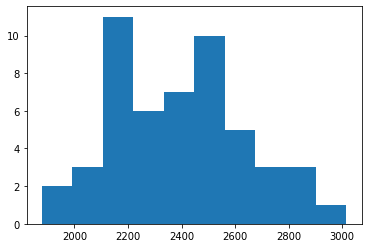

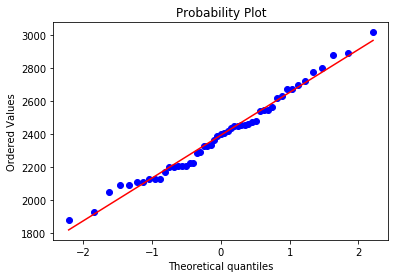

In [23]:
# Trouver une Variable dont la loi est normale
# Prenons le cas de la Variable "qt_kcal/h"
#plt.hist(df1_comp['F2'])

ax1 = plt.subplot(111)
res = plt.hist(gp1['qt_kcal/h'])
plt.savefig('OUTFILES/Etude4-Test_Var_Loi_Normal_Fig1_PJ5.png', dpi=100, bbox_inches='tight')
plt.show()


ax2 = plt.subplot(111)
res = scst.probplot(gp1['qt_kcal/h'], dist="norm", plot=plt)
plt.savefig('OUTFILES/Etude4-Test_Var_Loi_Normal_Fig2_PJ5.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

#### Test de Shapiro-Wilk  
Plus robuste que Kolmogorov-smirnov avec des echantillons faibles  

Valeur retournée :  W:Test statistic,  p-value:pour hypothese loi normale  
Hypothèse nulle H0 : la variable suit une loi normale   -  Fixer seuil à  : <b>α = 5%</b>  (Idéalement, il faudrait même avoir un seuil à 0.2)  
Le but du Test est de ne pas rejeter H0

<u>Interprétation</u>  
- Si la <b>p-value < α </b> : > Alors l'hypothèse nulle est rejetée (i.e. il est probable que les données NE sont PAS issues d'une population normalement distribuée)  

- Si la <b>p-value > α </b> : > Alors on doit pas rejeter l'hypothèse (i.e. il est probable que la variable suive une loi normale)

In [24]:
shapi = gp3.copy()
for column in shapi:
    a = scst.shapiro(shapi[column])
    print("Shapiro Test Result --- ", column, "--- : ", a)

Shapiro Test Result ---  evo_pop_% --- :  (0.9661992788314819, 0.5278126001358032)
Shapiro Test Result ---  ratio_prot_viande_% --- :  (0.9330544471740723, 0.09164133667945862)
Shapiro Test Result ---  qt_kcal/h --- :  (0.9723598957061768, 0.6851411461830139)
Shapiro Test Result ---  qt_prot_gr/h --- :  (0.9762445688247681, 0.7859658002853394)
Shapiro Test Result ---  qt_volaille_Kg/h --- :  (0.9708713889122009, 0.6460330486297607)
Shapiro Test Result ---  PIBh_$ --- :  (0.6939053535461426, 4.380546215543291e-06)
Shapiro Test Result ---  groupe --- :  (1.0, 1.0)


C:\Users\boiss\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1657: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [25]:
# Prenons la variable "qt_kcal/h" du Dataframe du Groupe 1
a = scst.shapiro(gp1['qt_kcal/h'])
print("La p-value du Test de Shapiro est :", a[1])

La p-value du Test de Shapiro est : 0.6176212430000305


La p-value est de 61.7%, on ne rejete pas l'hypothèse nulle -->  La variable suit une loi normale.

<hr style="height: 2px; color: #839D2D; width: 100%; ">

### Test de comparaison de deux populations (cas gaussien) avec <b>Bartlett</b> et le <b>T de Student</p>  
Trouver d'abord une variable qui suive une loi normale dans 2 clusters/groupes differents  

Prenons le cas de la variable précédente qt_kcal/h (qui suit une loi gaussienne) et regardons là sur les groupes 1 & 2 par exemple :  
<b>° Groupe1 - Pays très faiblement développés (PIB/h faible) et tres peu consommateurs de volailles</b>  
<b>° Groupe2 - Pays bien developpés à fort potentiel (PIB/h élevé) et moyennement consommateurs de volailles</b>  
° Groupe3 - Pays faiblement développés et peu consommateurs de volailles  
° Groupe4 - Pays moyennement développés et peu consommateurs de volailles  
° Groupe5 - Pays moyen-orient à forte évolution démographique et bons consommateurs de volailles  
° Groupe6 - Pays moyennement développés mais fort consommateurs de volailles  

In [26]:
# Test de Shapiro sur Variable Qt_kcal/h  pour le groupe1 - Pays faiblement developpé
shap_gr1 = scst.shapiro(gp1['qt_kcal/h'])
shap_gr2 = scst.shapiro(gp2['qt_kcal/h'])
print("La p-value de la variable ['qt_kcal/h'] du Test de Shapiro sur le Groupe 1 est :", shap_gr1[1])
print("La p-value de la variable ['qt_kcal/h'] du Test de Shapiro sur le Groupe 2 est :", shap_gr2[1])

La p-value de la variable ['qt_kcal/h'] du Test de Shapiro sur le Groupe 1 est : 0.6176212430000305
La p-value de la variable ['qt_kcal/h'] du Test de Shapiro sur le Groupe 2 est : 0.14615757763385773


Comparons les variances avec le <b>Test de Bartlett</b>.   
* Hypothèse nulle (H0) = Egalité des variances de la variable Qt_Kcal/h sur les groupes 1 & 2

In [27]:
bart = scst.bartlett(gp1['qt_kcal/h'], gp2['qt_kcal/h'])
print("La p-value de la variable ['qt_kcal/h'] du Test de Bartlett sur les Groupe 1 & 2 est :", bart[1])

La p-value de la variable ['qt_kcal/h'] du Test de Bartlett sur les Groupe 1 & 2 est : 0.8910800071519371


<u>CONCLUSION (Test Bartlett)</u> :   
La p-value élevée nous indique que l'on ne rejette pas l'hypothèse nulle H0 de l'égalité des variances de la variable Qt_Kcal/h sur les deux echantillons de pays Groupe1 & Groupe2.

Il nous faut donc poursuivre le test d'egalité des echantilloons en comparant les moyennes :  
Comparons les moyennes avec le <b>Test de Student (t)</b>.   
* Hypothèse nulle (H0) = Egalité des moyennes de la variable Qt_Kcal/h sur les groupes 1 & 2

In [28]:
t = scst.ttest_ind(gp1['qt_kcal/h'], gp2['qt_kcal/h'], equal_var=True)
print("La p-value de la variable ['qt_kcal/h'] du Test (t) de Student sur les Groupe 1 & 2 est :", t[1])

La p-value de la variable ['qt_kcal/h'] du Test (t) de Student sur les Groupe 1 & 2 est : 4.156224404098472e-24


<u>CONCLUSION (Test (t) de Student</u> :   
La p-value très faible 10 ^(-24) nous permet de rejeter (très facilement) l'hypothèse nulle H0 même avec un risque  
alpha = 1%
L'égalité des moyennes de la variable Qt_Kcal/h sur les deux echantillons de pays Groupe1 & Groupe2 n'est donc pas vraie.  
On peut le constater avec le calcul des centroides que l'on a effectué un peu plus tot

In [29]:
centroide

,count,evo_pop_%,qt_kcal/h,qt_prot_gr/h,ratio_prot_viande_%,qt_volaille_Kg/h,PIBh_$
groupe,,,,,,,
1,51,7.53,"2,393.65",60.29,10.81,4.89,"1,793.06"
2,22,2.58,"3,391.59",108.31,29.61,31.87,"59,650.60"
3,26,3.97,"2,676.62",72.78,21.56,18.96,"5,490.82"
4,38,0.86,"3,193.55",96.30,19.47,19.61,"12,570.54"
5,4,20.21,"3,202.50",88.95,22.81,32.07,"20,606.95"
6,27,3.38,"2,900.26",84.73,29.41,52.15,"13,777.15"


### Conclusion  :  Test de comparaison de deux populations   

Pour que les echantillons suivent la même loi de distribution il faut que les hypothèses d'égalité des variances ET des moyennes (H0) n'aient pas été rejetées.  
Or ici, le test des variances etait OK mais pas celui des moyennes.  
Donc nos deux echantillons "gaussiens" n'ont PAS la même distribution.

In [30]:
dureetotale = round(time.time() - trt_start_time, 5)
print("--- Durée TOTALE du Notebook PJ5 -1- Load&Clean --- ", "%s seconds" % dureetotale)

--- Durée TOTALE du Notebook PJ5 -1- Load&Clean ---  11.99493 seconds
